In [26]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np

# 📁 Upload your dataset (Colab will prompt file upload)
from google.colab import files
uploaded = files.upload()

Saving ecommerce_returns_synthetic_data.csv to ecommerce_returns_synthetic_data (1).csv


In [27]:
# 📄 Load the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# 👁️ Preview the data
print("🔍 Dataset Shape:", df.shape)
df.head()

🔍 Dataset Shape: (10000, 17)


,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,05-08-23,26-08-24,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,09-10-23,09-11-23,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,06-05-23,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,29-08-24,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,16-01-23,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


In [28]:
# 🔎 Check for missing values
missing = df.isnull().sum()
print("❓ Missing Values:\n", missing)

❓ Missing Values:
 Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64


In [29]:
# 🗓️ Convert date columns (if any)
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
if 'return_date' in df.columns:
    df['return_date'] = pd.to_datetime(df['return_date'], errors='coerce')

# 💲 Convert numeric columns
numeric_cols = ['price', 'quantity', 'discount']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [38]:

# 💹 Calculate total sales and total returns
df['total_value'] = df['Product_Price'] * df['Order_Quantity']
df[['Product_Price', 'Order_Quantity', 'total_value']].head(10)



,Product_Price,Order_Quantity,total_value
0,411.59,3,1234.77
1,288.88,3,866.64
2,390.03,5,1950.15
3,401.09,3,1203.27
4,110.09,4,440.36
5,252.12,1,252.12
6,382.89,2,765.78
7,306.39,3,919.17
8,302.40,5,1512.00
9,294.94,3,884.82


In [40]:
df['is_returned'] = df['Return_Status'].apply(lambda x: 1 if str(x).lower() == 'returned' else 0)
df['is_returned'].value_counts()
pd.crosstab(df['Return_Status'], df['is_returned'])


is_returned,0,1
Return_Status,,
Not Returned,4948,0
Returned,0,5052


In [41]:
# 💾 Save cleaned dataset to CSV
df.to_csv("cleaned_ecommerce_returns.csv", index=False)
files.download("cleaned_ecommerce_returns.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [43]:
#Overall Return Rate
return_rate = df['is_returned'].mean()
print(f"📦 Overall Return Rate: {return_rate:.2%}")


📦 Overall Return Rate: 50.52%


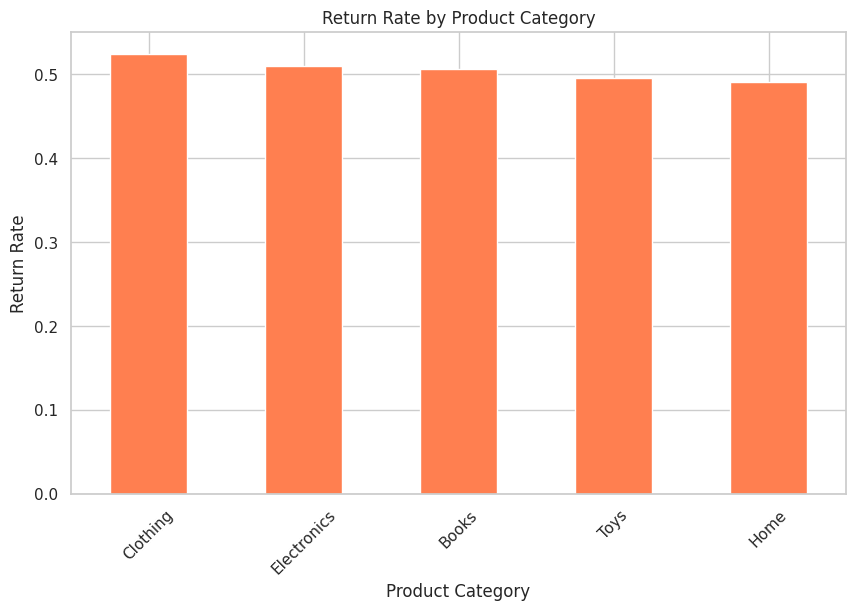

In [44]:
# Return Rate by Product Category
category_return = df.groupby('Product_Category')['is_returned'].mean().sort_values(ascending=False)

category_return.plot(kind='bar', color='coral')
plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()


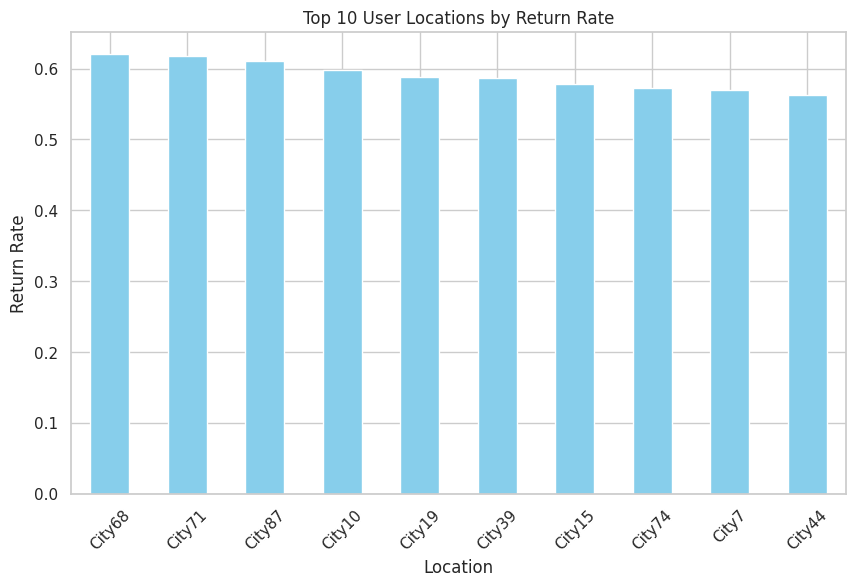

In [46]:
#Return Rate by User Location
location_return = df.groupby('User_Location')['is_returned'].mean().sort_values(ascending=False).head(10)

location_return.plot(kind='bar', color='skyblue')
plt.title("Top 10 User Locations by Return Rate")
plt.ylabel("Return Rate")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()


<ipython-input-48-eaa9f5e9fed4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='User_Gender', y='is_returned', palette='Set2')


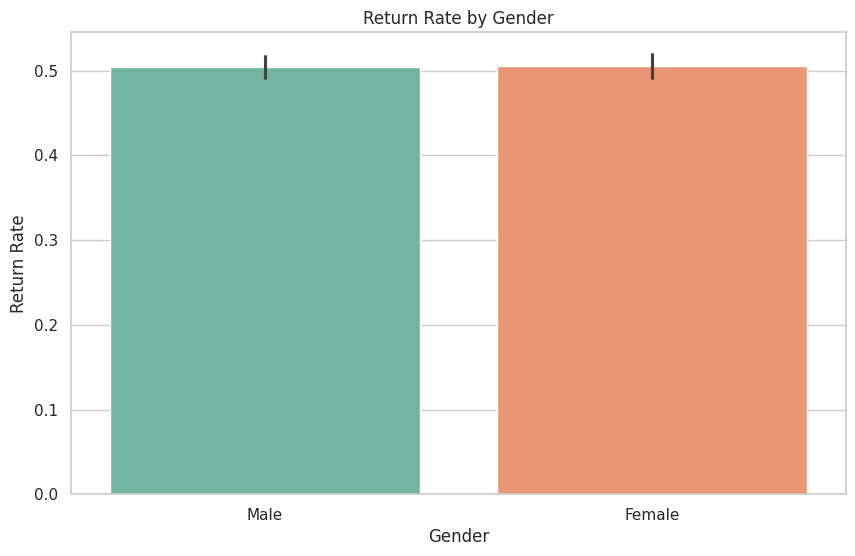

In [48]:
#Return Rate by User Gender
sns.barplot(data=df, x='User_Gender', y='is_returned', palette='Set2')
plt.title("Return Rate by Gender")
plt.ylabel("Return Rate")
plt.xlabel("Gender")
plt.show()


<ipython-input-49-dc1b9960d845>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_return = df.groupby('Age_Group')['is_returned'].mean()


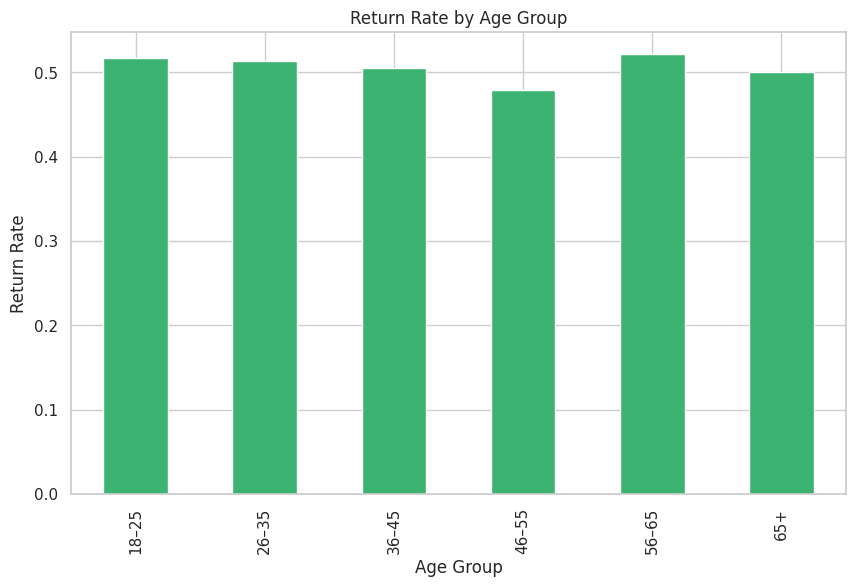

In [49]:
#Return Rate by Age Group (Binned)
df['Age_Group'] = pd.cut(df['User_Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+'])

age_return = df.groupby('Age_Group')['is_returned'].mean()
age_return.plot(kind='bar', color='mediumseagreen')
plt.title("Return Rate by Age Group")
plt.ylabel("Return Rate")
plt.xlabel("Age Group")
plt.show()


<ipython-input-51-41622336b02c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Shipping_Method', y='is_returned', palette='coolwarm')


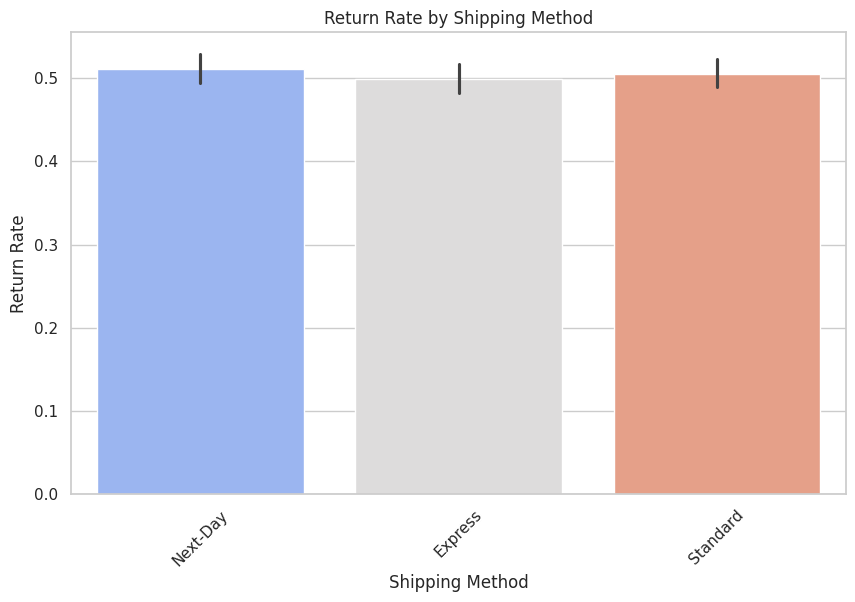

In [51]:
#Return Rate by Shipping Method
sns.barplot(data=df, x='Shipping_Method', y='is_returned', palette='coolwarm')
plt.title("Return Rate by Shipping Method")
plt.ylabel("Return Rate")
plt.xlabel("Shipping Method")
plt.xticks(rotation=45)
plt.show()


<ipython-input-52-54dbc7eca553>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_returned', y='Discount_Applied', palette='pastel')


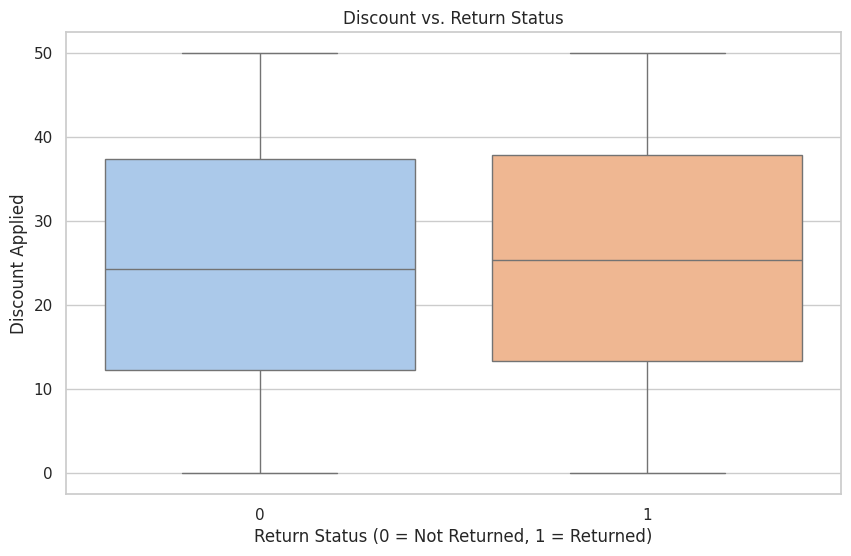

In [52]:
#Return Rate by Discount Applied
sns.boxplot(data=df, x='is_returned', y='Discount_Applied', palette='pastel')
plt.title("Discount vs. Return Status")
plt.ylabel("Discount Applied")
plt.xlabel("Return Status (0 = Not Returned, 1 = Returned)")
plt.show()


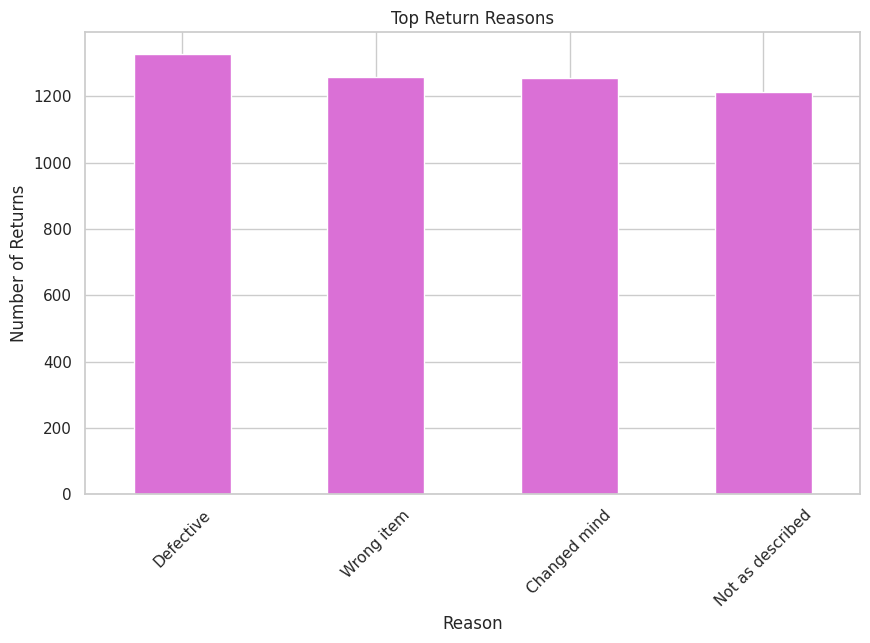

In [53]:
#Return Reason Frequency
reason_counts = df['Return_Reason'].value_counts().head(10)
reason_counts.plot(kind='bar', color='orchid')
plt.title("Top Return Reasons")
plt.ylabel("Number of Returns")
plt.xlabel("Reason")
plt.xticks(rotation=45)
plt.show()


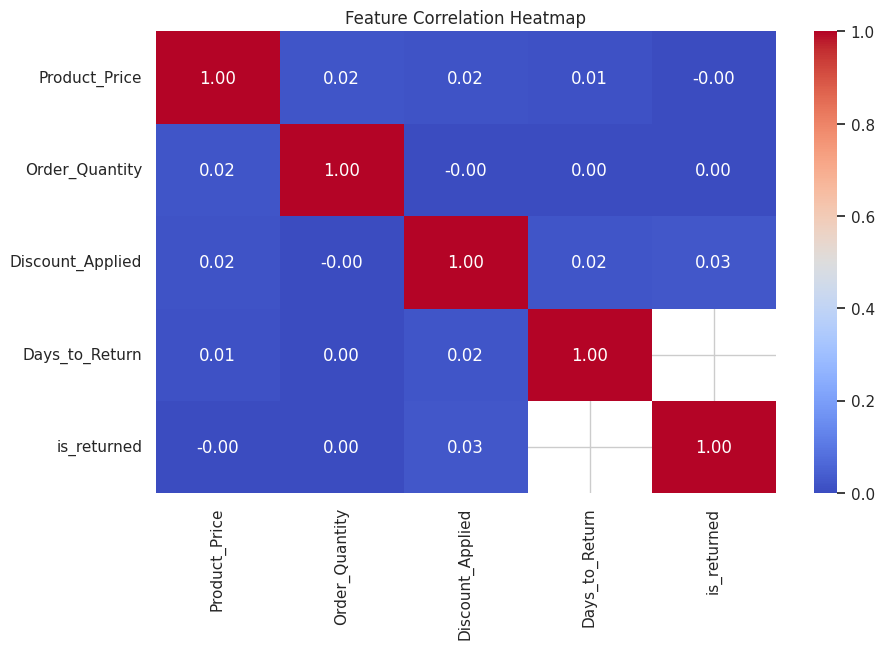

In [54]:
num_df = df[['Product_Price', 'Order_Quantity', 'Discount_Applied', 'Days_to_Return', 'is_returned']]
corr = num_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [55]:
# 💾 Save cleaned dataset to CSV
df.to_csv("cleaned_ecommerce_returns.csv", index=False)
files.download("cleaned_ecommerce_returns.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
#Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select features
features = ['Product_Category', 'User_Age', 'User_Gender', 'User_Location',
            'Shipping_Method', 'Discount_Applied', 'Order_Quantity', 'Product_Price']
X = df[features]
y = df['is_returned']

# Define categorical and numerical
cat_features = ['Product_Category', 'User_Gender', 'User_Location', 'Shipping_Method']
num_features = ['User_Age', 'Discount_Applied', 'Order_Quantity', 'Product_Price']

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_features)
], remainder='passthrough')


In [57]:
#Train-Test Split & Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Train
clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product_Category',
                                                   'User_Gender',
                                                   'User_Location',
                                                   'Shipping_Method'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [58]:
# Evaluate the Model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[468 541]
 [470 521]]
              precision    recall  f1-score   support

           0       0.50      0.46      0.48      1009
           1       0.49      0.53      0.51       991

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [59]:
#Predict Return Risk Score for All Rows
df['return_risk_score'] = clf.predict_proba(X)[:, 1]  # Probability of return


In [61]:
#Export High-Risk Products
high_risk = df[df['return_risk_score'] > 0.8]  # threshold can be adjusted
high_risk.to_csv('high_return_risk_products.csv', index=False)


In [62]:
#Check the Preprocessing (Encoding)
# Check what your encoder created
encoded_features = clf.named_steps['preprocess'].transformers_[0][1].get_feature_names_out()
print("Encoded categorical features:\n", encoded_features)


Encoded categorical features:
 ['Product_Category_Clothing' 'Product_Category_Electronics'
 'Product_Category_Home' 'Product_Category_Toys' 'User_Gender_Male'
 'User_Location_City10' 'User_Location_City100' 'User_Location_City11'
 'User_Location_City12' 'User_Location_City13' 'User_Location_City14'
 'User_Location_City15' 'User_Location_City16' 'User_Location_City17'
 'User_Location_City18' 'User_Location_City19' 'User_Location_City2'
 'User_Location_City20' 'User_Location_City21' 'User_Location_City22'
 'User_Location_City23' 'User_Location_City24' 'User_Location_City25'
 'User_Location_City26' 'User_Location_City27' 'User_Location_City28'
 'User_Location_City29' 'User_Location_City3' 'User_Location_City30'
 'User_Location_City31' 'User_Location_City32' 'User_Location_City33'
 'User_Location_City34' 'User_Location_City35' 'User_Location_City36'
 'User_Location_City37' 'User_Location_City38' 'User_Location_City39'
 'User_Location_City4' 'User_Location_City40' 'User_Location_City41'
 'U

In [64]:
#Check the Return Risk Scores
df[['Product_ID', 'return_risk_score']].head(10)
print(df['return_risk_score'].describe())


count    10000.000000
mean         0.507649
std          0.059730
min          0.319937
25%          0.468770
50%          0.505467
75%          0.542714
max          0.690058
Name: return_risk_score, dtype: float64


In [65]:
#Check High-Risk Exports
import pandas as pd
high_risk = pd.read_csv("high_return_risk_products.csv")
print(high_risk[['Product_ID', 'return_risk_score']].head())


Empty DataFrame
Columns: [Product_ID, return_risk_score]
Index: []


In [66]:
import numpy as np

model = clf.named_steps['model']
all_features = list(encoded_features) + num_features
importance = pd.DataFrame({'Feature': all_features, 'Coefficient': model.coef_[0]})
importance = importance.sort_values(by='Coefficient', key=abs, ascending=False)
print(importance.head(10))


                 Feature  Coefficient
73  User_Location_City71     0.621069
58  User_Location_City58     0.579577
90  User_Location_City87     0.554150
5   User_Location_City10     0.554125
22  User_Location_City25    -0.511963
37  User_Location_City39     0.504890
11  User_Location_City15     0.442745
45  User_Location_City46    -0.421284
69  User_Location_City68     0.412862
99  User_Location_City95     0.372000


In [67]:
# Set a more appropriate threshold for "high-risk"
high_risk_threshold = 0.6

# Filter rows above that threshold
high_risk_products = df[df['return_risk_score'] > high_risk_threshold][['Product_ID', 'return_risk_score']]

# Save to CSV again
high_risk_products.to_csv("high_return_risk_products.csv", index=False)

# Check
print(f"{len(high_risk_products)} high-risk products exported.")


770 high-risk products exported.


In [69]:
# Optional: Group rare locations into "Other"
top_locations = df['User_Location'].value_counts().nlargest(10).index
df['User_Location'] = df['User_Location'].apply(lambda x: x if x in top_locations else 'Other')
print(df['User_Location'].value_counts())

User_Location
Other     8947
City81     126
City36     122
City3      117
City22     116
City26     115
City28     115
City43     114
City1      114
City86     114
Name: count, dtype: int64


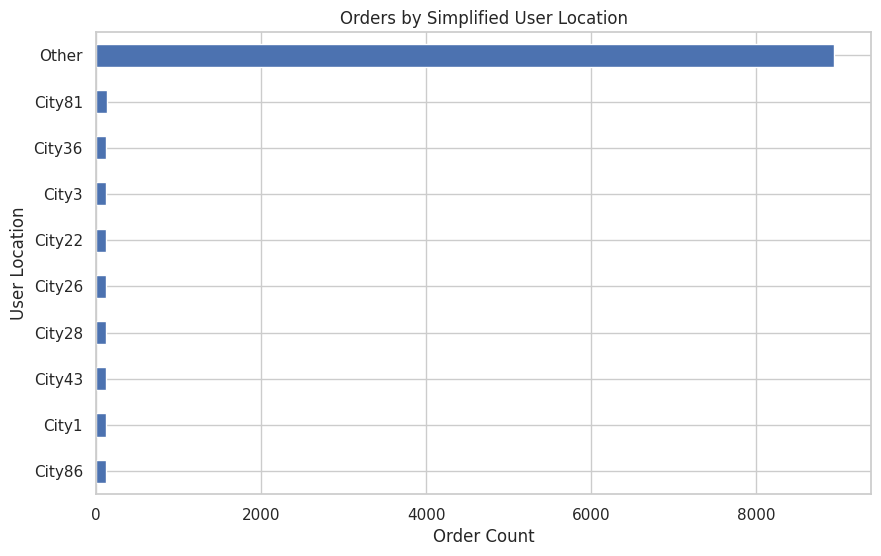

In [70]:
import matplotlib.pyplot as plt

top_location_counts = df['User_Location'].value_counts()
top_location_counts.plot(kind='barh', figsize=(10, 6), title='Orders by Simplified User Location')
plt.xlabel("Order Count")
plt.ylabel("User Location")
plt.gca().invert_yaxis()
plt.show()



In [71]:
# 💾 Save cleaned dataset to CSV
df.to_csv("cleaned_ecommerce_returns.csv", index=False)
files.download("cleaned_ecommerce_returns.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>